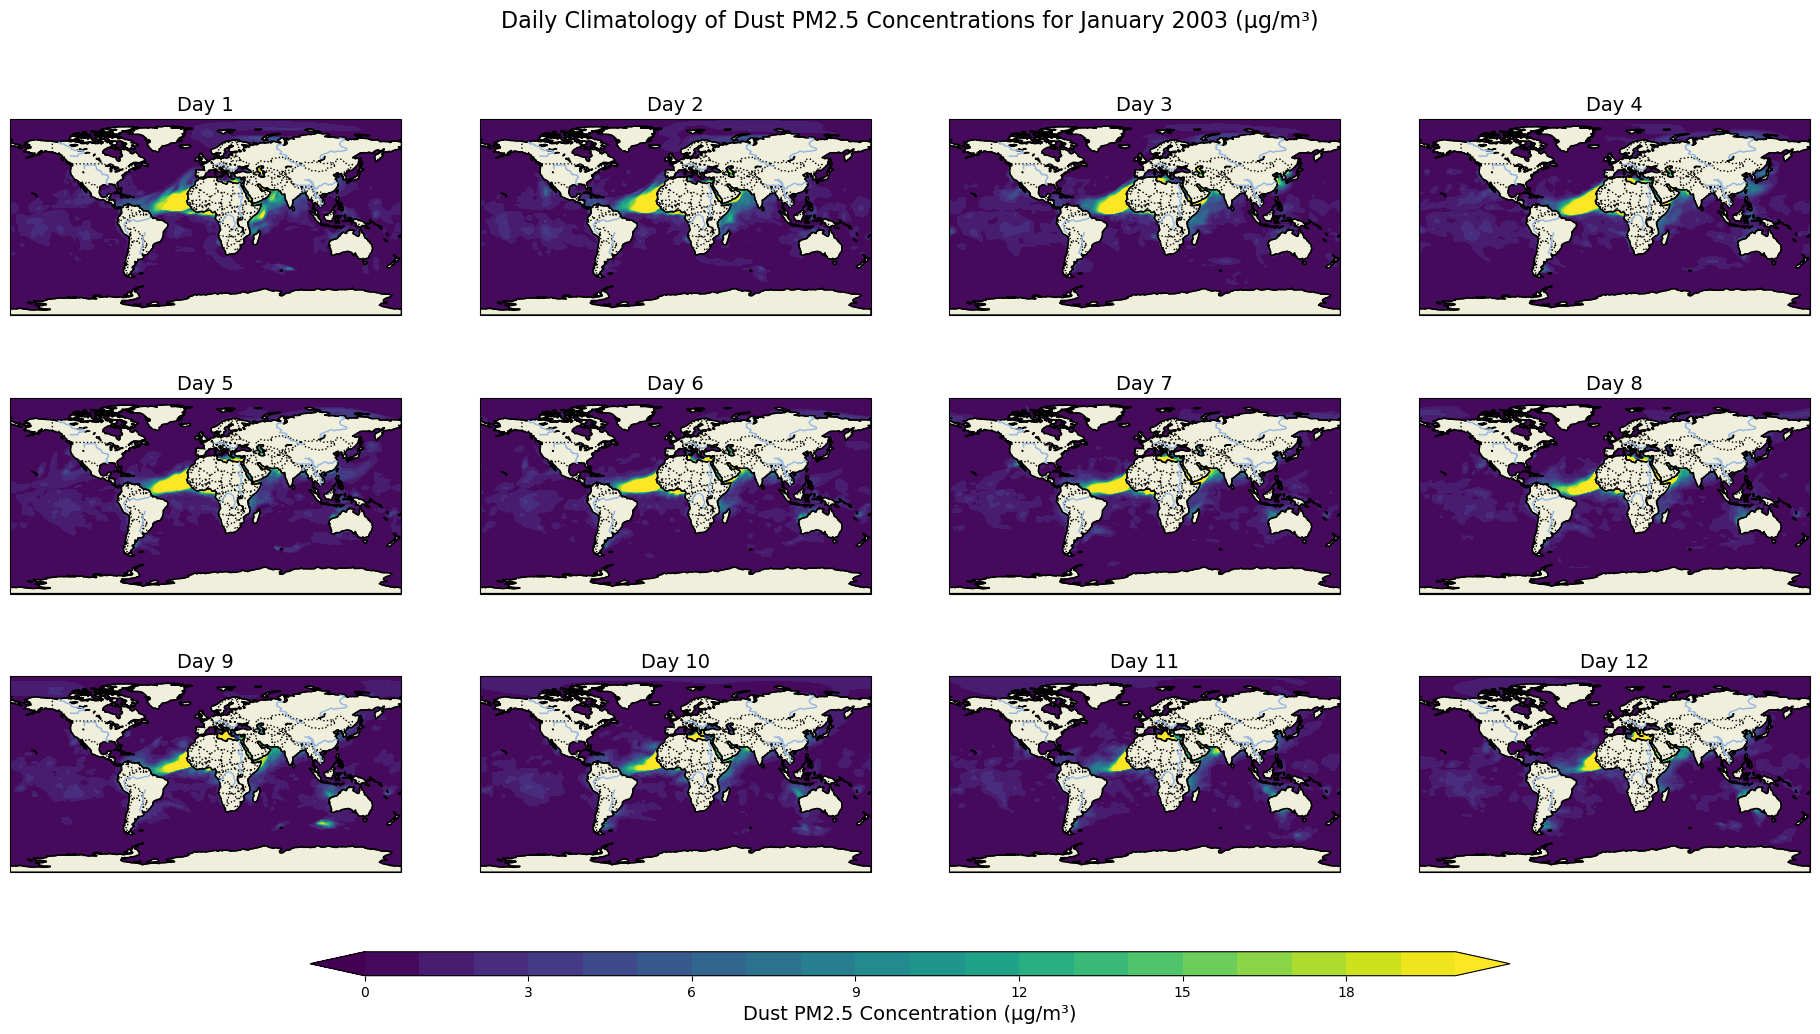

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import cartopy.feature as cfeature
import numpy as np
from cartopy.util import add_cyclic_point

# Step 1: Load your dataset
files = sorted(glob.glob("/home/salmadan/Desktop/groups/ESS3/Sara/daily/mean/DUST_PM_AOD_2003*_tot.nc"))
ds = xr.open_mfdataset(files, combine='by_coords', chunks={'time': 1})  # Load in chunks by time

# Step 2: Select data for January (1st to 12th)
jan_days = ds.sel(time=slice('2003-01-01', '2003-01-12'))

# Step 3: Create a figure with subplots for each day
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Daily Climatology of Dust PM2.5 Concentrations for January 2003 (µg/m³)', fontsize=16)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Define levels for contour plotting
clevs = np.linspace(0, 20, 21)  # Adjust according to your data range

# Loop through the first 12 days of January
for i in range(12):
    ax = axs[i]
    dust_pm25_day = jan_days['dust_pm25'][i, :, :].compute()  # Compute only this day
    
    # Plot the data directly without adding a cyclic point
    lons = jan_days['lon']
    lats = jan_days['lat']
    
    # Ensure lons and lats are properly aligned for contourf
    cs = ax.contourf(lons, lats, dust_pm25_day, clevs, 
                     transform=ccrs.PlateCarree(), cmap='viridis', extend='both')

    # Adding geographical features
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS)

    # Setting titles using day names
    ax.set_title(f'Day {i + 1}', fontsize=14)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)

    # Set grid
    #ax.gridlines(draw_labels=True)
    
# Adjust layout to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.25)

# Add a colorbar below the plots
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])  # Adjust the position as needed
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Dust PM2.5 Concentration (µg/m³)', fontsize=14)

# Show the plot
plt.show()


*Try again with the Land order at the backward*

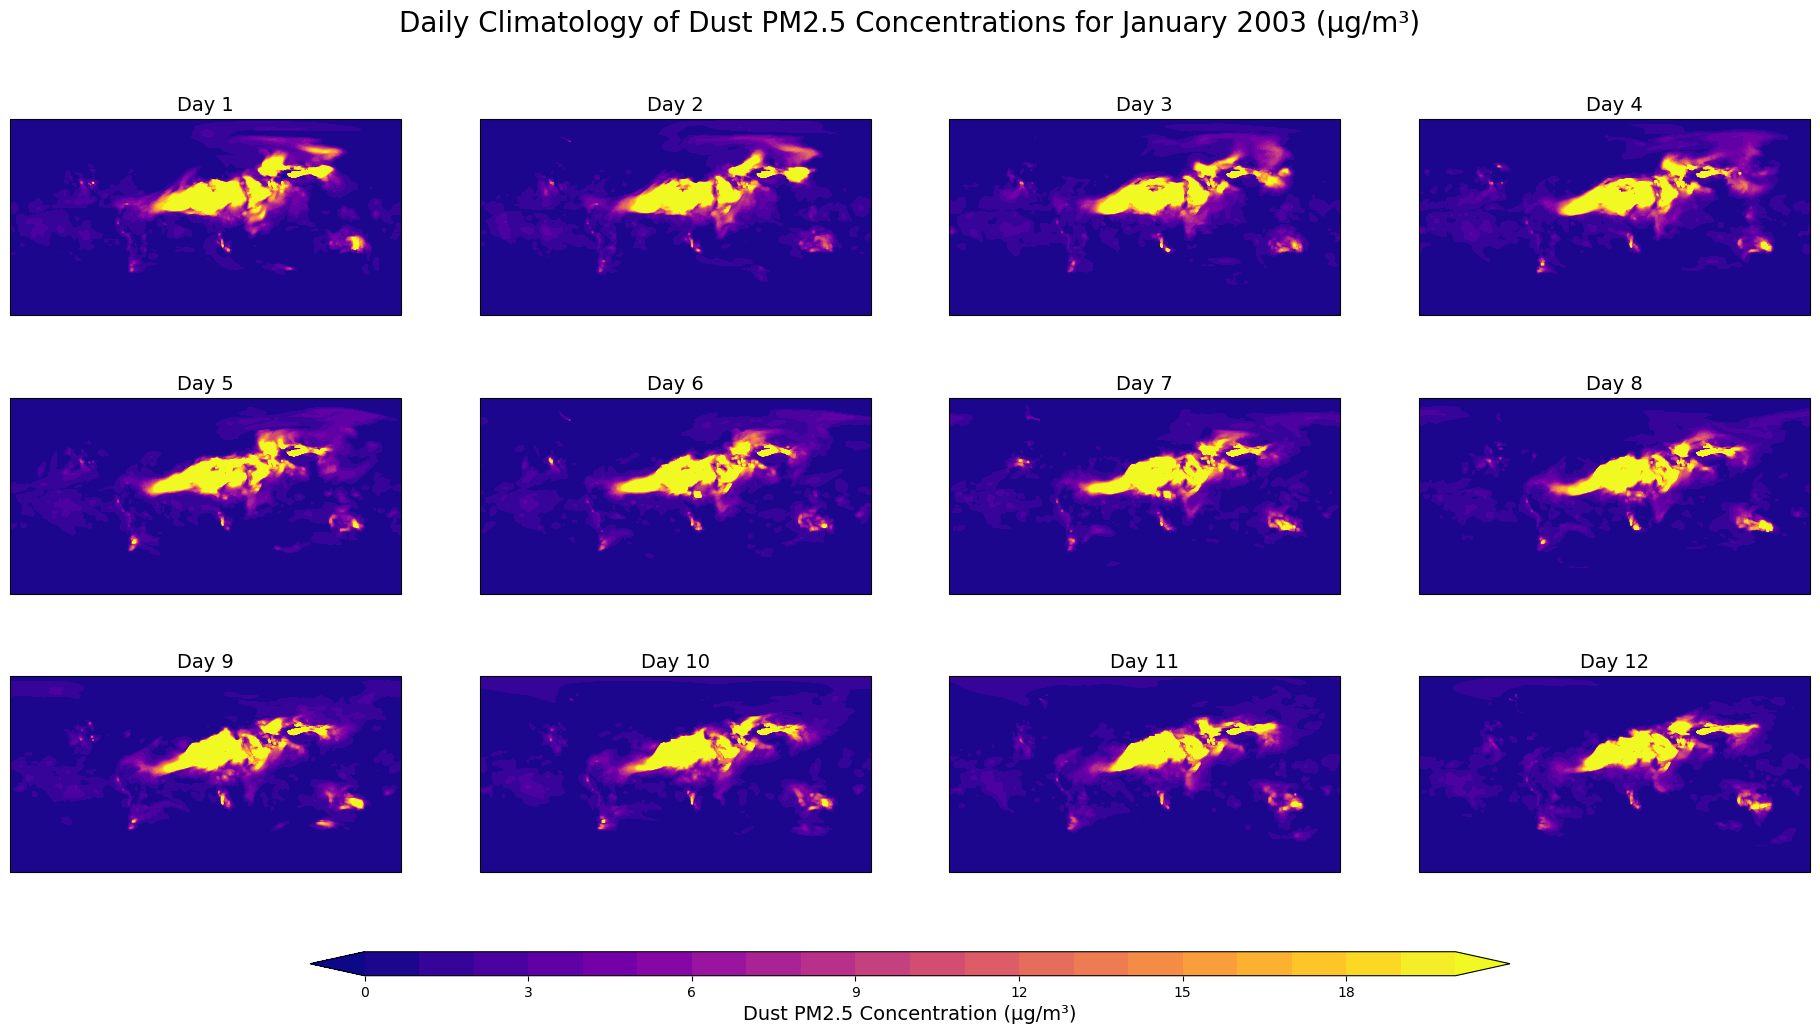

In [36]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import cartopy.feature as cfeature
import numpy as np
from cartopy.util import add_cyclic_point

# Step 1: Load your dataset
files = sorted(glob.glob("/home/salmadan/Desktop/groups/ESS3/Sara/daily/mean/DUST_PM_AOD_2003*_tot.nc"))
ds = xr.open_mfdataset(files, combine='by_coords', chunks={'time': 1})  # Load in chunks by time

# Step 2: Select data for January (1st to 12th)
jan_days = ds.sel(time=slice('2003-01-01', '2003-01-12'))

# Step 3: Create a figure with subplots for each day
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Daily Climatology of Dust PM2.5 Concentrations for January 2003 (µg/m³)', fontsize=20)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Define levels for contour plotting
clevs = np.linspace(0, 20, 21)  # Adjust according to your data range

# Loop through the first 12 days of January
for i in range(12):
    ax = axs[i]
    dust_pm25_day = jan_days['dust_pm25'][i, :, :].compute()  # Compute only this day
    
     # Add the cyclic point
    #dust_pm25_day, lons = add_cyclic_point(dust_pm25_day, coord=jan_days['lon'])
    # Plot the data directly without adding a cyclic point
    lons = jan_days['lon']
    lats = jan_days['lat']
    
    # Plot the data with the new colormap
    cs = ax.contourf(lons, lats, dust_pm25_day, clevs, 
                     transform=ccrs.PlateCarree(), cmap='plasma', extend='both', zorder=2) 

    # Adding geographical features with specified land color
    ax.add_feature(cfeature.LAND, zorder=1, facecolor='#D5DDC9')  # Set land color
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.COASTLINE, edgecolor='white')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS)

    # Setting titles using day names
    ax.set_title(f'Day {i + 1}', fontsize=14)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)

    # Set grid
    #ax.gridlines(draw_labels=True)

# Adjust layout to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.25)

# Add a colorbar below the plots
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])  # Adjust the position
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Dust PM2.5 Concentration (µg/m³)', fontsize=14)

# Show the plot
plt.show()

*Try the monthly mean but it takes time to process*

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import cartopy.feature as cfeature
import numpy as np
from cartopy.util import add_cyclic_point
# Step 1: Load your dataset
files = sorted(glob.glob("/home/salmadan/Desktop/groups/ESS3/Sara/daily/mean/DUST_PM_AOD_2003*_tot.nc"))
ds = xr.open_mfdataset(files, combine='by_coords')

# Step 2: Create monthly climatology for dust_pm25
monthly_clim = ds.groupby('time.month').mean(dim='time').compute()
# Define levels for contour plotting
clevs = np.linspace(0, 20, 21)  # Adjust according to your data range

# List of month names
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Step 3: Create a figure with subplots for each month
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Monthly Climatology of Dust PM2.5 Concentrations (µg/m³)', fontsize=16)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through each month
for i in range(12):
    ax = axs[i]
    dust_pm25_month = monthly_clim['dust_pm25'][i, :, :]  # Extract dust PM2.5 data for the month
    
    # Add the cyclic point for longitude
    dust_pm25_month, lons = add_cyclic_point(dust_pm25_month, coord=monthly_clim['lon'])

    # Contour plot
    cs = ax.contourf(lons, monthly_clim['lat'], dust_pm25_month, clevs, 
                     transform=ccrs.PlateCarree(), cmap='viridis', extend='both')

    # Adding geographical features
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS)

    # Setting titles and labels using month names
    ax.set_title(month_names[i], fontsize=14)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)

    # Set grid
    ax.gridlines(draw_labels=True)

# Add a colorbar below the plots
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])  # Adjust the position as needed
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Dust PM2.5 Concentration (µg/m³)', fontsize=20)

# Show the plot
plt.show()
